<a href="https://colab.research.google.com/github/Ahmed-Medhat1911/Churn-Analysis/blob/main/Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#@title Read the file
df=pd.read_csv("/content/telecom_customer_churn.csv")

In [ ]:
#@title Data Head
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [ ]:
#@title Basic insights about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              7043 non-null   objec

In [ ]:
#@title Show statistical insights about the data
df.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,14.200374,19.586585,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,13.050000,13.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,37.680000,30.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [ ]:
#@title DATA PREPROCESSING

In [ ]:
#@title Check duplicates
df.duplicated().sum()

0

In [ ]:
#@title Check missing Values
df.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                  

In [ ]:
#@title Dealing with missing Values
columns_to_keep_missing = ['Avg Monthly Long Distance Charges', 'Multiple Lines', 'Internet Type',
                            'Avg Monthly GB Download', 'Online Security', 'Online Backup',
                            'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
                            'Streaming Movies', 'Streaming Music', 'Unlimited Data']

df = df.dropna(subset=columns_to_keep_missing)

# Print information about the new dataset
print("Original dataset shape:", df.shape)
print("Cleaned dataset shape:", df.shape)

# The 'Churn Reason' and 'Churn Category' columns still have missing values
# You can choose to keep these columns if needed, or fill the missing values in these columns

# Example of filling missing values in 'Churn Reason' and 'Churn Category'
df['Churn Reason'].fillna("Unknown", inplace=True)
df['Churn Category'].fillna("Unknown", inplace=True)

# Print information about the dataset after handling missing values in 'Churn Reason' and 'Churn Category'
print("Final dataset shape:", df.shape)

# Now, df_cleaned should contain the dataset with missing rows removed, except for 'Churn Reason' and 'Churn Category'

Original dataset shape: (4835, 38)
Cleaned dataset shape: (4835, 38)
Final dataset shape: (4835, 38)


<ipython-input-11-dfc388c67402>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Churn Reason'].fillna("Unknown", inplace=True)
<ipython-input-11-dfc388c67402>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Churn Category'].fillna("Unknown", inplace=True)


In [ ]:
df.isnull().sum()

Customer ID                          0
Gender                               0
Age                                  0
Married                              0
Number of Dependents                 0
City                                 0
Zip Code                             0
Latitude                             0
Longitude                            0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data           

In [ ]:
#@title Check if customer IDS are unique or not
duplicate_customer_ids = df['Customer ID'][df['Customer ID'].duplicated()]

if duplicate_customer_ids.empty:
    print("All Customer IDs are unique.")
else:
    print("Duplicate Customer IDs found:")
    print(duplicate_customer_ids)

All Customer IDs are unique.


In [ ]:
df['Download Category'] = pd.cut(df['Avg Monthly GB Download'],
                                             bins=[0, 10, 25, 50, float('inf')],
                                             labels=['<10', '<25', '<50', '>50'],
                                             right=False)

<ipython-input-14-2286af989e52>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Download Category'] = pd.cut(df['Avg Monthly GB Download'],


In [ ]:
#@title EDA


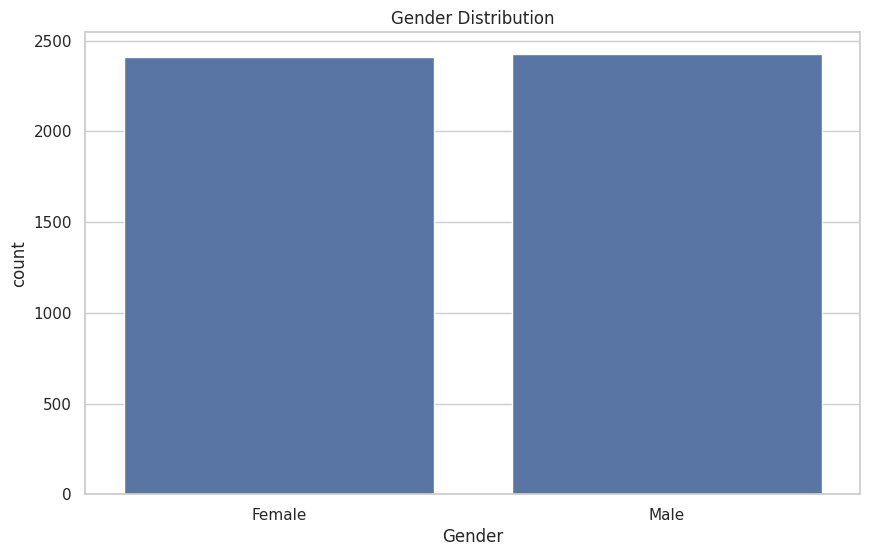

In [ ]:
sns.set(style="whitegrid")

# Gender distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

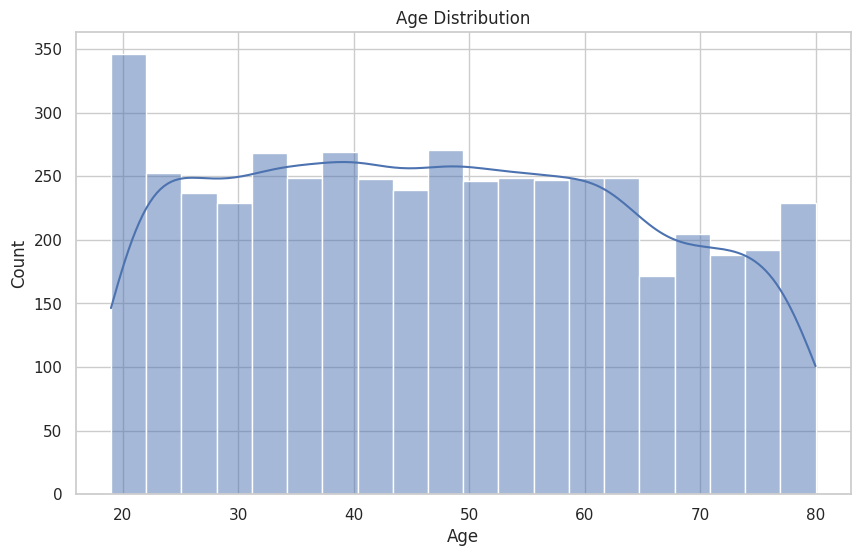

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

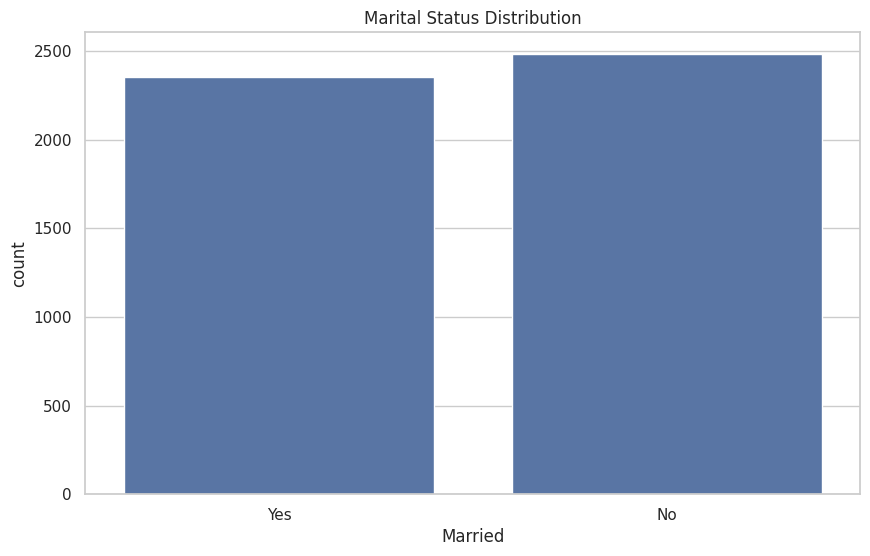

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Marital status distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Married', data=df)
plt.title('Marital Status Distribution')
plt.show()

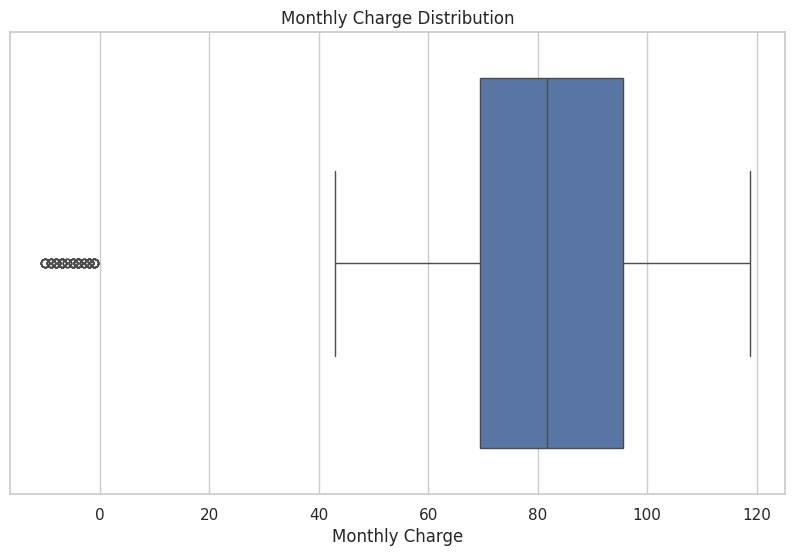

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Monthly Charge', data=df)
plt.title('Monthly Charge Distribution')
plt.show()

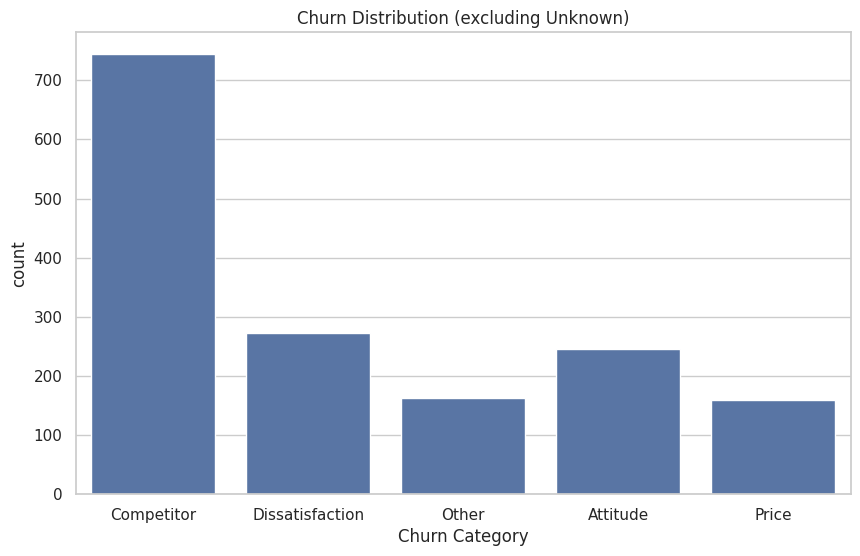

In [ ]:
df_known_churn = df[df['Churn Category'] != 'Unknown']

# Plot churn distribution without 'Unknown' category
plt.figure(figsize=(10, 6))
sns.countplot(x='Churn Category', data=df_known_churn)
plt.title('Churn Distribution (excluding Unknown)')
plt.show()

Overall Churn Rate (excluding Unknown): 0.0


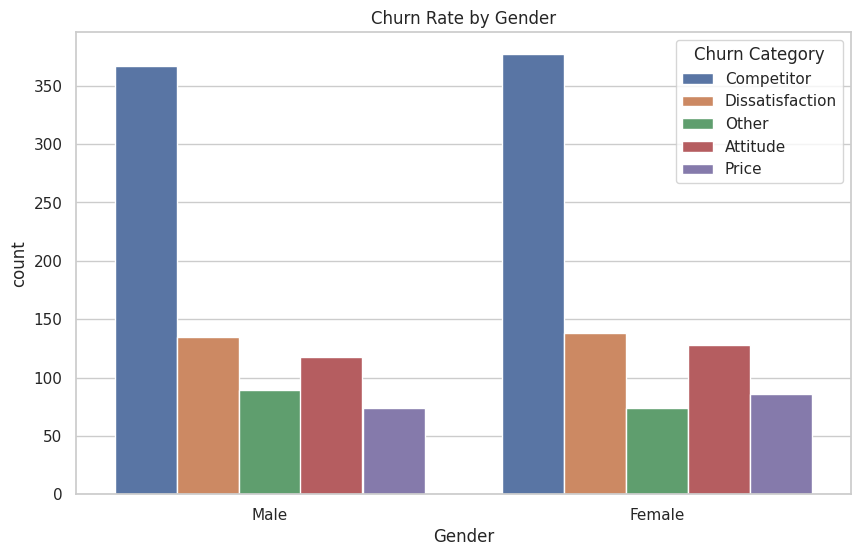


Churn Rate by Gender (excluding Unknown):
 Gender
Female    0.0
Male      0.0
Name: Churn Category, dtype: float64


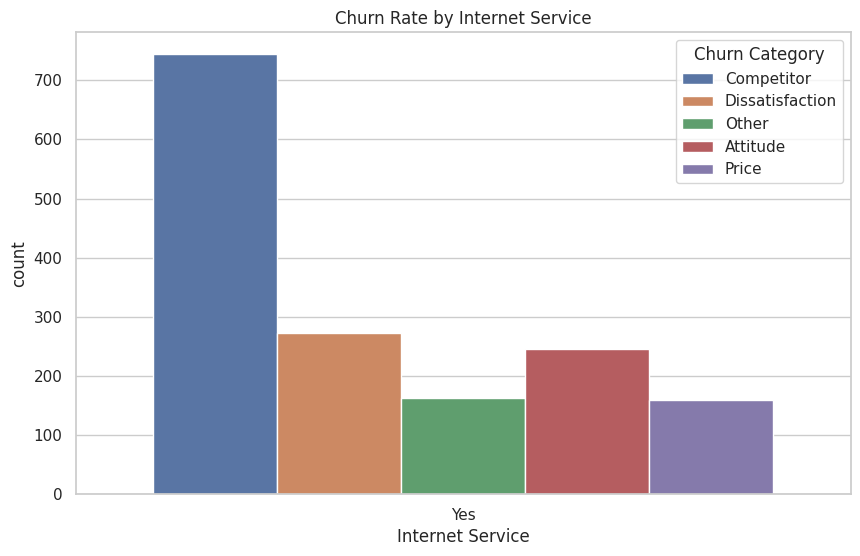


Churn Rate by Internet Service (excluding Unknown):
 Internet Service
Yes    0.0
Name: Churn Category, dtype: float64


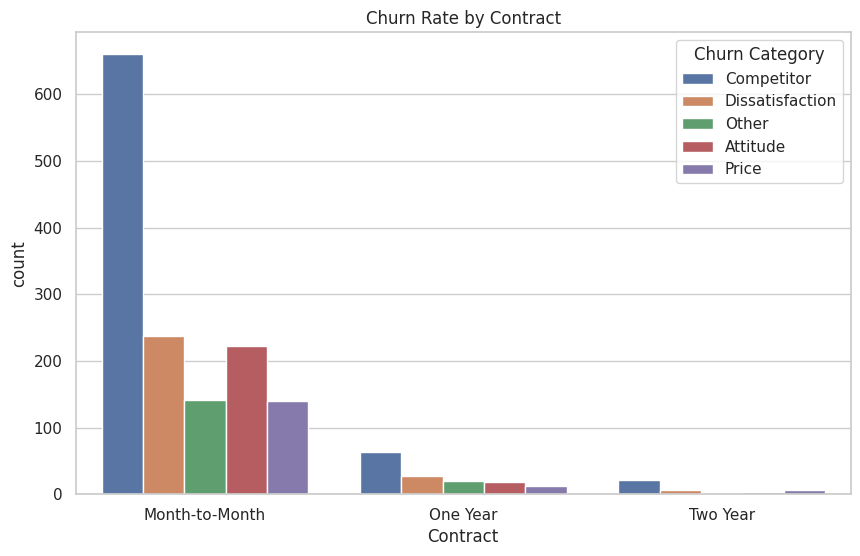


Churn Rate by Contract (excluding Unknown):
 Contract
Month-to-Month    0.0
One Year          0.0
Two Year          0.0
Name: Churn Category, dtype: float64


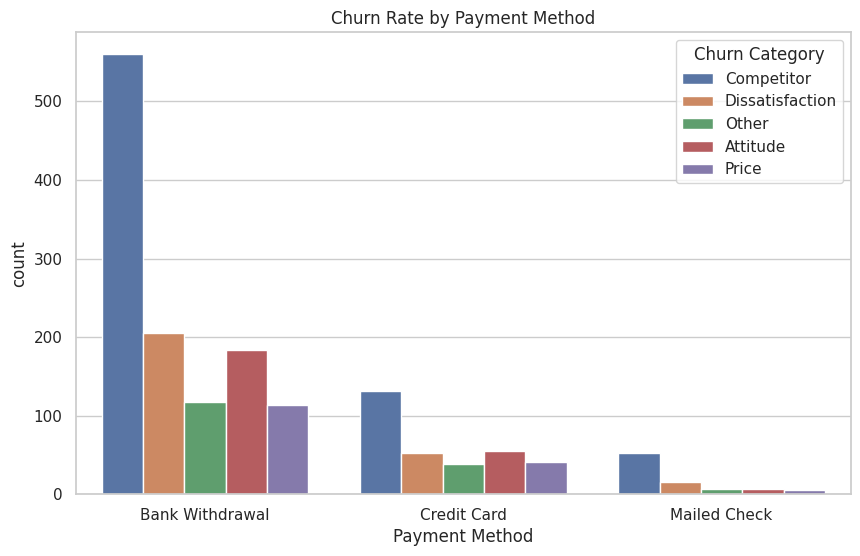


Churn Rate by Payment Method (excluding Unknown):
 Payment Method
Bank Withdrawal    0.0
Credit Card        0.0
Mailed Check       0.0
Name: Churn Category, dtype: float64


In [ ]:
# Filter out rows where 'Churn Category' is not 'Unknown'
df_known_churn = df[df['Churn Category'] != 'Unknown']

# Calculate overall churn rate
total_customers = len(df_known_churn)
churned_customers = df_known_churn['Churn Category'].eq('Churn').sum()
overall_churn_rate = churned_customers / total_customers
print("Overall Churn Rate (excluding Unknown):", overall_churn_rate)

# Calculate churn rate by specific categories (e.g., 'Gender', 'Internet Service', 'Contract', etc.)
categories = ['Gender', 'Internet Service', 'Contract','Payment Method']

for category in categories:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=category, hue='Churn Category', data=df_known_churn)
    plt.title(f'Churn Rate by {category}')
    plt.show()

    churn_rate_by_category = df_known_churn.groupby(category)['Churn Category'].apply(lambda x: (x == 'Churn').mean())
    print(f'\nChurn Rate by {category} (excluding Unknown):\n', churn_rate_by_category)

Overall Churn Count (excluding Unknown): 0


<ipython-input-22-26ba65b76130>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_known_churn['Download Category'] = pd.cut(df_known_churn['Avg Monthly GB Download'],


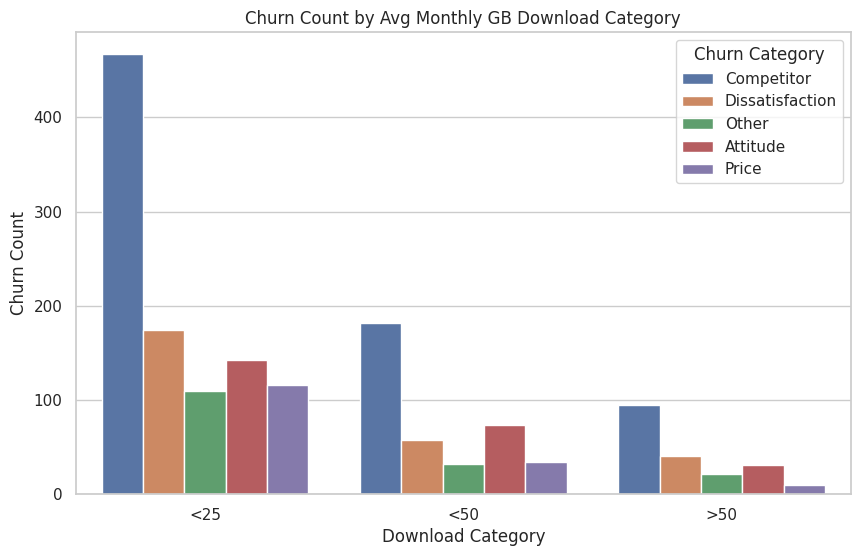

In [ ]:
# Create a new categorical variable for 'Avg Monthly GB Download' with three categories
df_known_churn['Download Category'] = pd.cut(df_known_churn['Avg Monthly GB Download'],
                                             bins=[-float('inf'), 25, 50, float('inf')],
                                             labels=['<25', '<50', '>50'],
                                             right=False)

# Calculate overall churn count
total_customers = len(df_known_churn)
churned_customers = df_known_churn['Churn Category'].eq('Churn').sum()
overall_churn_count = churned_customers
print("Overall Churn Count (excluding Unknown):", overall_churn_count)

# Calculate churn count for 'Avg Monthly GB Download' categories
plt.figure(figsize=(10, 6))
sns.countplot(x='Download Category', hue='Churn Category', data=df_known_churn)
plt.title('Churn Count by Avg Monthly GB Download Category')
plt.ylabel('Churn Count')
plt.show()

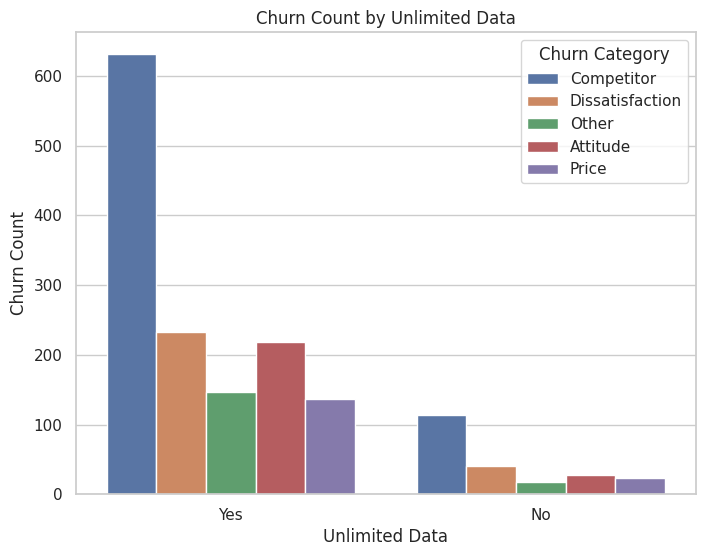


Churn Rate by Unlimited Data (excluding Unknown):


In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Unlimited Data', hue='Churn Category', data=df_known_churn)
plt.title('Churn Count by Unlimited Data')
plt.ylabel('Churn Count')
plt.show()

# Calculate churn rate for 'Unlimited Data'
churn_rate_by_unlimited_data = df.groupby('Unlimited Data')['Churn Category']
print('\nChurn Rate by Unlimited Data (excluding Unknown):\n', churn_rate_by_unlimited_data)

<ipython-input-24-0823b679a147>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Customer Status', y='Total Revenue', data=df, ci=None)


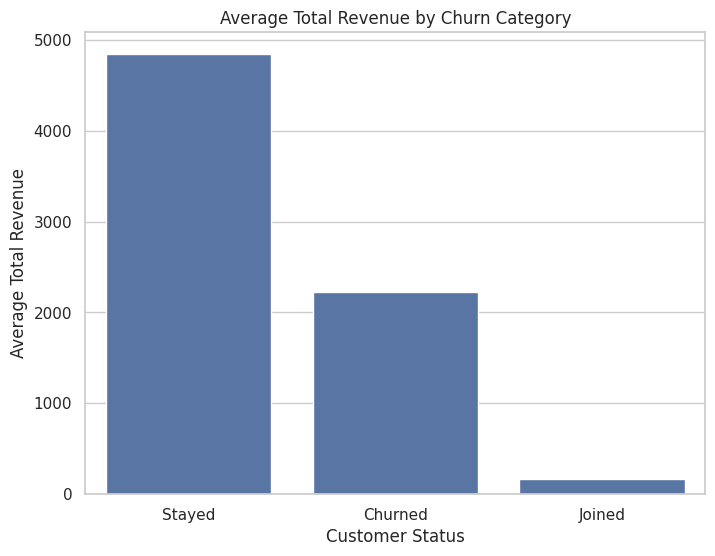


Average Total Revenue by Churn Category (excluding Unknown):
 Customer Status
Churned    2221.295649
Name: Total Revenue, dtype: float64


In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Customer Status', y='Total Revenue', data=df, ci=None)
plt.title('Average Total Revenue by Churn Category')
plt.ylabel('Average Total Revenue')
plt.show()

# Calculate average total revenue for churned and non-churned customers
avg_total_revenue_by_churn = df_known_churn.groupby('Customer Status')['Total Revenue'].mean()
print('\nAverage Total Revenue by Churn Category (excluding Unknown):\n', avg_total_revenue_by_churn)

In [ ]:
from google.colab import files

csv_file_path = 'Churn.csv'
df.to_csv(csv_file_path, index=False)

# Download CSV File
files.download(csv_file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>